In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

In [2]:
log1 = pd.read_csv('./DCI Logs/Log1.csv')
log2 = pd.read_csv('./DCI Logs/Log2.csv')
log3 = pd.read_csv('./DCI Logs/Log3.csv')
log4 = pd.read_csv('./DCI Logs/Log4.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,9,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Check # of columns in logs

In [3]:
logs = [log1, log2, log3, log4]
for idx, log in enumerate(logs):
    print('Log#:{}'.format(idx) , '# fo columns:{}'.format(len(log.columns)))

Log#:0 # fo columns:37
Log#:1 # fo columns:38
Log#:2 # fo columns:38
Log#:3 # fo columns:37


## Empty column: Unnamed: 37

In [4]:
pprint(log2['Unnamed: 37'].unique())
pprint(log3['Unnamed: 37'].unique())

array([ nan])
array([ nan])


In [5]:
#Drop empty column
log2 = log2.drop(['Unnamed: 37'], axis=1)
log3 = log3.drop(['Unnamed: 37'], axis=1)

## Check LogID range for each log file

In [6]:
for idx, log in enumerate(logs):
    print(idx+1, log['LogID'].min(), log['LogID'].max())
    print('\n')

1 261350492 270966314


2 261355717 271399475


3 261341794 278485322


4 261342043 270154346




## Concatenate log files to a single log table

In [7]:
log = pd.concat([log1, log2, log3, log4], axis=0)

In [8]:
# log = pd.read_csv('./trunc_master.csv')

In [9]:
log.head()

LogID  DBox_ID  Theater_ID Serial_No Log_Type   Log_Category  \
0  261464736     7107        5472    251413  content  assetingested   
1  261464737     7107        5472    251413  content  assetingested   
2  261464738     7107        5472    251413  content  assetingested   
3  261464739     7107        5472    251413  content  assetingested   
4  261464740     7107        5472    251413  content  assetingested   

  Content_Type                                  UUID Content_Name Duration  \
0          cpl  C0D38901-11F3-426D-8C00-A01A0BFED3F6          NaN        0   
1          cpl  27A63FFF-5748-489B-9D7D-4CE836ED1F7D          NaN        0   
2          cpl  181600F2-25E4-482A-BE82-47536414323A          NaN        0   
3          cpl  A9070947-2D90-4733-9C28-95E571372ABD          NaN        0   
4          cpl  FAB568FE-4581-4D61-B1A4-CEBF62B71A8C          NaN        0   

     ...     UFO_Spl_Format_Violation Schedule_Revision Schedule_Desc  \
0    ...                            0                 0           NaN   
1    ...                            0                 0           NaN   
2    ...                            0                 0           NaN   
3    ...                            0                 0           NaN   
4    ...                            0                 0           NaN   

  Schema_Ele_Type Schema_No Group_No Sequence_No Element_Type IsValid  \
0             NaN       0.0        0           0          NaN     NaN   
1             NaN       0.0        0           0          NaN     NaN   
2             NaN       0.0        0           0          NaN     NaN   
3             NaN       0.0        0           0          NaN     NaN   
4             NaN       0.0        0           0          NaN     NaN   

   IsInValid  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 37 columns]

In [10]:
del log1
del log2
del log3
del log4

In [11]:
log.shape

(3117842, 37)

## Null stats for the log table

In [12]:
null_counts = np.sum(pd.isnull(log), axis=0).values
percent_null = null_counts/log.shape[0]
null_df = pd.DataFrame([log.columns, null_counts, percent_null]).T
null_df.columns = ['Column name', 'Null value count', '% null values']
null_df

Column name Null value count % null values
0                      LogID                0             0
1                    DBox_ID                0             0
2                 Theater_ID                0             0
3                  Serial_No                0             0
4                   Log_Type                0             0
5               Log_Category                0             0
6               Content_Type          1320016      0.423375
7                       UUID           123735     0.0396861
8               Content_Name          1477395      0.473852
9                   Duration            52453     0.0168235
10                   Show_Id          2803203      0.899084
11                    KDM_Id          3075648      0.986467
12                  Log_Time               73   2.34136e-05
13             Received_Time                0             0
14                     Error          3054036      0.979535
15               Error_Level          3001656      0.962735
16           ping_ip_address           313710      0.100618
17                  event_id               73   2.34136e-05
18         chassis_serial_no              685   0.000219703
19             auto_inserted                0             0
20                Log_Source          3117769      0.999977
21             ServerType_ID               73   2.34136e-05
22               IsProcessed          1368542      0.438939
23         DateTime_Inserted                4   1.28294e-06
24               UFO_Show_Id          2692862      0.863694
25               Schedule_id               73   2.34136e-05
26                     RO_ID                0             0
27  UFO_Spl_Format_Violation                0             0
28         Schedule_Revision                0             0
29             Schedule_Desc          2757097      0.884297
30           Schema_Ele_Type          2692935      0.863718
31                 Schema_No               73   2.34136e-05
32                  Group_No                0             0
33               Sequence_No                0             0
34              Element_Type          2692862      0.863694
35                   IsValid          3117842             1
36                 IsInValid          3115474      0.999241

### Target columns include: LogID, Theater_ID, Log_Category, Content_Name, Log_time

### Of these Content_Name and Log_Time have null values, with about 47% of Content_Name being null and Log_Time having only 73 null values

### RO_ID appears as a common column between advert schedule and logs, if it is linked to content it can perhaps be used to replace the nulls in the logs with advert names from the schedules

In [13]:
advt_sched = pd.read_excel('./DCI Logs/Advertisement Schedule (Updated).xlsx')
advt_master = pd.read_excel('./DCI Logs/Advertisement Master.xlsx')

In [14]:
null_content_idx = pd.isnull(log['Content_Name']) #Extract indices with null content names
RO_ID_null_content_names = log[ null_content_idx ]['RO_ID'].value_counts().index

In [15]:
advt_sched[ advt_sched['RO_ID'].isin(RO_ID_null_content_names) ][['Advt_Name', 'Cont_Name']][0:10]

Advt_Name  \
0   Thums Up Charged Teaser Ranveer Singh 20 Sec E...   
2   Thums Up Charged Teaser Ranveer Singh 20 Sec E...   
3                   Nirdosh Trl 12133 UA 60 Sec Hindi   
4      Zee Marathi Disha Generic Promo 30 Sec Marathi   
5      Zee Marathi Disha Generic Promo 30 Sec Marathi   
6                  LIC Shloka Song Aug17 30 Sec Hindi   
8         BMS Vodafone Badminton Lucknow 20 Sec Hindi   
9             Christmas Wishes From UFO 5 Sec English   
10                Kayam Churna Tablet AS 10 Sec Hindi   
11                New Flamingo Heat Belt 15 Sec Hindi   

                                            Cont_Name  
0   Thums_Up_Charged_Teaser_Ranveer_Singh_20_Sec_E...  
2   Thums_Up_Charged_Teaser_Ranveer_Singh_20_Sec_E...  
3               Nirdosh_Hindi_Trl_12133_UA_ADVT_CC_UA  
4   Zee_Marathi_Disha_Generic_Promo_30_Sec_Marathi...  
5   Zee_Marathi_Disha_Generic_Promo_30_Sec_Marathi...  
6             LIC_Shloka_Song_30_Sec_Hindi_100817_RAD  
8   BMS_Vodafone_Badminton_Lucknow_20Sec_Hindi_221...  
9   Cheistmas_Wishes_Form_UFO_5sec_English_071217_RAD  
10                    Kayam_Tablet_10sec_Hindi_260417  
11         New_Flamingo_Heat_Belt_15_Sec_Hindi_240117

## Find common columns between the files

In [16]:
log_cols = set(log.columns)
sched_cols = set(advt_sched.columns)
master_cols = set(advt_master.columns)

In [17]:
log_cols.intersection(sched_cols)

{'RO_ID', 'Theater_ID'}

In [18]:
log_cols.intersection(advt_master.columns)

{'Duration'}

In [19]:
master_cols.intersection(sched_cols)

{'Advt_Name'}

## Null counts for the schedule and master tables

In [20]:
np.sum(pd.isnull(advt_sched), axis=0)

Theater_ID                0
RO_ID                     0
Validation_From           0
Validation_to             0
Advt_ID                   0
Advt_Name                 0
Cont_Name                 0
Advertisement Duration    0
dtype: int64

In [21]:
np.sum(pd.isnull(advt_master), axis=0)

Advt_Id                  0
Advt_Name                0
Advt_Code              241
Client_ID                0
Sub_Client_ID          241
Client_Code            960
Agency_ID                0
Agency_Code            960
Product_ID             241
Theme                  241
Duration                 0
Advt_Language          241
Geographical_region      0
Content_Available      960
IsActive                 0
datetime_added           0
userid                   0
datetime_Modified      805
userId_Modified        805
advttype                 0
Zone_ID                960
receipt_date           960
Caption_Name           297
Is_Caravan               1
Clienttype               1
Certification            0
CommTrRemark           898
CommType               244
AdvtgrupId             958
Unnamed: 29            958
Unnamed: 30            958
Unnamed: 31            958
Unnamed: 32            958
Unnamed: 33            959
Unnamed: 34            960
dtype: int64

### Changing timestamps

In [22]:
time_columns = ['Log_Time', 'Received_Time', 'DateTime_Inserted']
for col in time_columns:
    log[col] = log[col].astype(str).apply(lambda x: x[0:16])
    log[col] = pd.to_datetime(log[col], format='%d-%m-%Y %H:%M')

In [23]:
#Change dtype to pandas timestamp
log[time_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117842 entries, 0 to 837605
Data columns (total 3 columns):
Log_Time             datetime64[ns]
Received_Time        datetime64[ns]
DateTime_Inserted    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 95.1 MB


In [24]:
log[time_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117842 entries, 0 to 837605
Data columns (total 3 columns):
Log_Time             datetime64[ns]
Received_Time        datetime64[ns]
DateTime_Inserted    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 95.1 MB


In [25]:
log['RO_ID'].nunique(), advt_sched['RO_ID'].nunique()

(1131, 1026)

In [26]:
log['Theater_ID'].nunique(), advt_sched['Theater_ID'].nunique()

(200, 3930)

In [27]:
## Explain why RO_Ids and theater_IDs differ

## The logs and the schedule have different no. of unique RO_IDs and Theater_IDs

In [28]:
len(set(log['RO_ID']).intersection(set(advt_sched['RO_ID']))), len(set(log['Theater_ID']).intersection(set(advt_sched['Theater_ID'])))

(470, 194)

## 470 RO_IDs and 194 Theater_IDs are in common between the logs and the schedule

## Comparing advertisements between Schedule and Master

In [29]:
names_sched = set(advt_sched['Advt_Name'])
names_master = set(advt_master['Advt_Name'])

In [30]:
len(names_sched), len(names_master)

(554, 960)

In [31]:
len(names_sched.intersection(names_master))

331

In [32]:
len(names_master - names_sched)

629

In [33]:
len(names_sched - names_master)

223

## There are 554 adnames in schedule, 960 in master. Of these, 331 are common in both. 629 are present only in master and 223 are present only in schedule

In [34]:
in_master_not_schedule = list(names_master - names_sched)
in_schedule_not_master = list(names_sched - names_master)
common = names_sched.intersection(names_master)

In [35]:
in_master_not_schedule[0:10]

['73932 Framez Classifieds Mumbai 33 Sec Hindi',
 'Drinking Drive 30 Sec Punjabi',
 '72923 Framez MAH Pune Cluster 12 35 Sec Marathi',
 'DIPR Kshreeabhagya 60 Sec Kannada',
 'OLPS_ALMUNI_ASSOCIATION_10376',
 'udankhatola_10038',
 'KULFI_HOUSE_TPYT_DEC_2017_9939',
 'Helmet 30 Sec Telugu',
 'Aadhar Classroom 30 Sec Kannada',
 'Rep2 Desh Kaise Chalta hai 45 Sec Gujarati']

In [36]:
advt_sched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110066 entries, 0 to 110065
Data columns (total 8 columns):
Theater_ID                110066 non-null int64
RO_ID                     110066 non-null int64
Validation_From           110066 non-null datetime64[ns]
Validation_to             110066 non-null datetime64[ns]
Advt_ID                   110066 non-null int64
Advt_Name                 110066 non-null object
Cont_Name                 110066 non-null object
Advertisement Duration    110066 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 6.7+ MB


In [37]:
#record level are there any ads in the schedule not in the master
#Visualize which ads are being shown where and for how long

## Keep only selected columns for log tables

In [38]:
init_cols = set(log.columns)
keep_cols = set(['LogID', 'Theater_ID', 'Log_Category', 'Content_Name', 'Content_Type', 'RO_ID', 'Log_Time'])
drop_cols = init_cols - keep_cols
drop_cols

{'DBox_ID',
 'DateTime_Inserted',
 'Duration',
 'Element_Type',
 'Error',
 'Error_Level',
 'Group_No',
 'IsInValid',
 'IsProcessed',
 'IsValid',
 'KDM_Id',
 'Log_Source',
 'Log_Type',
 'Received_Time',
 'Schedule_Desc',
 'Schedule_Revision',
 'Schedule_id',
 'Schema_Ele_Type',
 'Schema_No',
 'Sequence_No',
 'Serial_No',
 'ServerType_ID',
 'Show_Id',
 'UFO_Show_Id',
 'UFO_Spl_Format_Violation',
 'UUID',
 'auto_inserted',
 'chassis_serial_no',
 'event_id',
 'ping_ip_address'}

In [39]:
log = log.drop(list(drop_cols), axis=1)

In [40]:
log.to_csv('./trunc_log.csv')

In [41]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117842 entries, 0 to 837605
Data columns (total 7 columns):
LogID           int64
Theater_ID      int64
Log_Category    object
Content_Type    object
Content_Name    object
Log_Time        datetime64[ns]
RO_ID           int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 190.3+ MB


## Keep only the selected columns from advt. master

In [42]:
master_keep_cols = set(['Advt_Name', 'Advt_Id', 'Client_ID', 'Agency_ID', 'Duration', 'Advt_Language'])
master_drop_cols = list(set(advt_master.columns)-master_keep_cols)
master_drop_cols

['Clienttype',
 'CommType',
 'Zone_ID',
 'datetime_added',
 'Content_Available',
 'userId_Modified',
 'AdvtgrupId',
 'Unnamed: 31',
 'advttype',
 'Client_Code',
 'Unnamed: 32',
 'Certification',
 'Geographical_region',
 'Sub_Client_ID',
 'Caption_Name',
 'IsActive',
 'receipt_date',
 'Is_Caravan',
 'userid',
 'Product_ID',
 'Unnamed: 33',
 'Agency_Code',
 'datetime_Modified',
 'CommTrRemark',
 'Theme',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 34',
 'Advt_Code']

In [43]:
advt_master = advt_master.drop(master_drop_cols, axis=1)

In [44]:
advt_master.to_csv('./trunc_master.csv')

In [45]:
advt_sched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110066 entries, 0 to 110065
Data columns (total 8 columns):
Theater_ID                110066 non-null int64
RO_ID                     110066 non-null int64
Validation_From           110066 non-null datetime64[ns]
Validation_to             110066 non-null datetime64[ns]
Advt_ID                   110066 non-null int64
Advt_Name                 110066 non-null object
Cont_Name                 110066 non-null object
Advertisement Duration    110066 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 6.7+ MB


In [46]:
advt_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
Advt_Id          960 non-null int64
Advt_Name        960 non-null object
Client_ID        960 non-null int64
Agency_ID        960 non-null int64
Duration         960 non-null int64
Advt_Language    719 non-null object
dtypes: int64(4), object(2)
memory usage: 45.1+ KB


In [47]:
advt_master.columns = ['Advt_ID', 'Advt_Name', 'Client_ID', 'Agency_ID', 'Duration',
       'Advt_Language']

In [48]:
advt_master.columns

Index(['Advt_ID', 'Advt_Name', 'Client_ID', 'Agency_ID', 'Duration',
       'Advt_Language'],
      dtype='object')

In [49]:
advt_sched.columns

Index(['Theater_ID', 'RO_ID', 'Validation_From', 'Validation_to', 'Advt_ID',
       'Advt_Name', 'Cont_Name', 'Advertisement Duration'],
      dtype='object')

In [50]:
log.shape

(3117842, 7)

In [51]:
advt_sched.shape

(110066, 8)

## Fix Content_Type names. (some have spaces)

In [52]:
log['Content_Type'] = log['Content_Type'].str.lower()
log['Content_Type'] = log['Content_Type'].str.strip()
log['Content_Type'].value_counts()

advertisement    1389890
marker            199718
feature            81314
spl                54557
cpl                27637
trailer            17843
kdm                10452
short               5684
policy              5088
psa                 2303
teaser              1982
test                1026
transitional         332
Name: Content_Type, dtype: int64

In [53]:
log.head()

LogID  Theater_ID   Log_Category Content_Type Content_Name  \
0  261464736        5472  assetingested          cpl          NaN   
1  261464737        5472  assetingested          cpl          NaN   
2  261464738        5472  assetingested          cpl          NaN   
3  261464739        5472  assetingested          cpl          NaN   
4  261464740        5472  assetingested          cpl          NaN   

             Log_Time  RO_ID  
0 2017-12-15 01:08:00      0  
1 2017-12-15 01:08:00      0  
2 2017-12-15 01:09:00      0  
3 2017-12-15 01:09:00      0  
4 2017-12-15 01:09:00      0

## Join logs and schedule tables

In [54]:
join1 = log.merge(advt_sched, on=['Theater_ID', 'RO_ID'], how='left')

In [55]:
join1_inner = log.merge(advt_sched, on=['Theater_ID', 'RO_ID'])

In [56]:
join1_inner.shape

(175493, 13)

In [57]:
join1.shape

(3117842, 13)

In [58]:
join1.head()

LogID  Theater_ID   Log_Category Content_Type Content_Name  \
0  261464736        5472  assetingested          cpl          NaN   
1  261464737        5472  assetingested          cpl          NaN   
2  261464738        5472  assetingested          cpl          NaN   
3  261464739        5472  assetingested          cpl          NaN   
4  261464740        5472  assetingested          cpl          NaN   

             Log_Time  RO_ID Validation_From Validation_to  Advt_ID Advt_Name  \
0 2017-12-15 01:08:00      0             NaT           NaT      NaN       NaN   
1 2017-12-15 01:08:00      0             NaT           NaT      NaN       NaN   
2 2017-12-15 01:09:00      0             NaT           NaT      NaN       NaN   
3 2017-12-15 01:09:00      0             NaT           NaT      NaN       NaN   
4 2017-12-15 01:09:00      0             NaT           NaT      NaN       NaN   

  Cont_Name  Advertisement Duration  
0       NaN                     NaN  
1       NaN                     NaN  
2       NaN                     NaN  
3       NaN                     NaN  
4       NaN                     NaN

In [59]:
join1.to_csv('C:/Users/user/Desktop/UFO_merge/join1.csv.gz', compression='gzip')

## Join resultant with advt_master table

In [60]:
join2 = join1.merge(advt_master, on=['Advt_ID'], how='left')

In [61]:
join2_inner = join1_inner.merge(advt_master, on=['Advt_ID'])

## View dimensions of joined table

In [62]:
join2.shape

(3117842, 18)

## View dimensions of joined tables after dropping rows containing null values

In [63]:
join2.dropna().shape

(89053, 18)

## Set column names.

In [64]:
join2.columns = ['LogID', 'Theater_ID', 'Log_Category', 'Logs_Content_Type', 'Logs_Content_Name', 'Log_Time',
       'RO_ID', 'Validation_From', 'Validation_to', 'Advt_ID', 'Schedule_Advt_Name',
       'Schedule_Content_Name', 'Schedule_Duration', 'Master_Advt_Name', 'Client_ID',
       'Agency_ID', 'Master_Duration', 'Advt_Language']

## View schema of joined table

In [65]:
join2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117842 entries, 0 to 3117841
Data columns (total 18 columns):
LogID                    int64
Theater_ID               int64
Log_Category             object
Logs_Content_Type        object
Logs_Content_Name        object
Log_Time                 datetime64[ns]
RO_ID                    int64
Validation_From          datetime64[ns]
Validation_to            datetime64[ns]
Advt_ID                  object
Schedule_Advt_Name       object
Schedule_Content_Name    object
Schedule_Duration        float64
Master_Advt_Name         object
Client_ID                float64
Agency_ID                float64
Master_Duration          float64
Advt_Language            object
dtypes: datetime64[ns](3), float64(4), int64(3), object(8)
memory usage: 452.0+ MB


## Describe features 1

In [66]:
join2.describe()

LogID    Theater_ID         RO_ID  Schedule_Duration  \
count  3.117842e+06  3.117842e+06  3.117842e+06      175493.000000   
mean   2.651505e+08  5.488284e+03  1.323388e+04          29.407013   
std    2.301921e+06  2.251076e+03  3.664596e+04          13.755112   
min    2.613418e+08  1.200000e+01 -1.000000e+00           5.000000   
25%    2.632919e+08  4.270000e+03  0.000000e+00          20.000000   
50%    2.648601e+08  5.651000e+03  0.000000e+00          30.000000   
75%    2.668350e+08  6.805000e+03  0.000000e+00          30.000000   
max    2.784853e+08  9.215000e+03  1.186750e+05         120.000000   

           Client_ID      Agency_ID  Master_Duration  
count  175493.000000  175493.000000    175493.000000  
mean     5470.561498     368.225046        29.407013  
std      3737.140271     333.289201        13.755112  
min        17.000000      12.000000         5.000000  
25%      1531.000000      35.000000        20.000000  
50%      7123.000000     418.000000        30.000000  
75%      8492.000000     573.000000        30.000000  
max     10242.000000    1031.000000       120.000000

## Describe features 2

In [67]:
desc_vals = []
for col in join2.columns:
    if join2[col].dtype == 'object':
        desc = join2[col].describe()
        idx = desc.index
        desc_vals.append([col]+desc.values.tolist()) 

desc1 = pd.DataFrame(desc_vals)
desc1.columns = ['Column Name', 'Count', 'No. of unique values', 'Mode', 'Mode_count']
desc1

Column Name      Count  No. of unique values  \
0           Log_Category  3117842.0                  29.0   
1      Logs_Content_Type  1797826.0                  13.0   
2      Logs_Content_Name  1640447.0                5743.0   
3                Advt_ID   175493.0                 286.0   
4     Schedule_Advt_Name   175493.0                 286.0   
5  Schedule_Content_Name   175493.0                 286.0   
6       Master_Advt_Name   175493.0                 286.0   
7          Advt_Language   175493.0                  13.0   

                                          Mode  Mode_count  
0                                     cplstart    861288.0  
1                                advertisement   1389890.0  
2                                  Blank Slide     31176.0  
3                                        51545      8156.0  
4             Nokia 2 Day Storage 15 Sec Hindi      8156.0  
5  Nokia_2_Day_Stoarage_15sec_Hindi_081217_RAD      8156.0  
6             Nokia 2 Day Storage 15 Sec Hindi      8156.0  
7                                        Hindi    123480.0

## Null value stats for joined table

In [110]:
joined_null_counts = (np.sum(pd.isnull(join2), axis=0))
joined_percent_nulls = (np.sum(pd.isnull(join2), axis=0)/len(join2)*100)
joined_null_stats = pd.DataFrame([joined_null_counts, joined_percent_nulls]).T
joined_null_stats.columns = ['Null counts', '% null']
joined_null_stats

Null counts     % null
LogID                          0.0   0.000000
Theater_ID                     0.0   0.000000
Log_Category                   0.0   0.000000
Logs_Content_Type        1320016.0  42.337489
Logs_Content_Name        1477395.0  47.385179
Log_Time                      73.0   0.002341
RO_ID                          0.0   0.000000
Validation_From          2942349.0  94.371331
Validation_to            2942349.0  94.371331
Advt_ID                  2942349.0  94.371331
Schedule_Advt_Name       2942349.0  94.371331
Schedule_Content_Name    2942349.0  94.371331
Schedule_Duration        2942349.0  94.371331
Master_Advt_Name         2942349.0  94.371331
Client_ID                2942349.0  94.371331
Agency_ID                2942349.0  94.371331
Master_Duration          2942349.0  94.371331
Advt_Language            2942349.0  94.371331

### Write to csv.

In [74]:
join2.to_csv('./join_2.csv')

## end

In [68]:
join2.sort_values(by=['Theater_ID','Log_Time']).head(100)

LogID  Theater_ID        Log_Category Logs_Content_Type  \
1419283  261387557          12  contenttransferred     advertisement   
1419333  261420453          12  contenttransferred     advertisement   
1493956  261574931          12       assetingested               cpl   
1450775  261567832          12       assetingested               cpl   
1503506  261577148          12       assetingested               cpl   
1439916  261567339          12       assetingested               cpl   
1418992  261442119          12  contenttransferred     advertisement   
1418994  261442534          12  contenttransferred     advertisement   
1418993  261442264          12  contenttransferred     advertisement   
1418995  261442535          12  contenttransferred     advertisement   
1505185  261578056          12       assetingested               cpl   
1450781  261566728          12       assetingested               cpl   
1418996  261443035          12  contenttransferred     advertisement   
1418997  261443375          12  contenttransferred     advertisement   
1450782  261566729          12       assetingested               cpl   
1527450  261578995          12       assetingested               cpl   
1490800  261573670          12       assetingested               cpl   
1419000  261444342          12  contenttransferred     advertisement   
1419001  261444343          12  contenttransferred     advertisement   
1418999  261444264          12  contenttransferred     advertisement   
1419002  261444441          12  contenttransferred     advertisement   
1418998  261444172          12  contenttransferred     advertisement   
1485758  261572060          12       assetingested               cpl   
1516920  261579107          12       assetingested               cpl   
1419003  261444824          12  contenttransferred     advertisement   
1419332  261444966          12  contenttransferred     advertisement   
1419336  261456493          12  contenttransferred     advertisement   
1419337  261456494          12  contenttransferred     advertisement   
1430538  261475550          12  contenttransferred     advertisement   
1430539  261475551          12  contenttransferred     advertisement   
...            ...         ...                 ...               ...   
1490792  261572835          12   cplsequenceplayed               NaN   
1490799  261573556          12            cplcheck               NaN   
1490804  261574079          12              cplend               NaN   
1493955  261574083          12            cplcheck               NaN   
1496354  261574932          12     kdmkeysreceived               NaN   
1496357  261574935          12            cplcheck               NaN   
1496358  261574936          12            cplcheck               NaN   
1496360  261575498          12            cplstart               NaN   
1496362  261575500          12            cplcheck               NaN   
1496363  261575501          12            cplcheck               NaN   
1496364  261575502          12            cplcheck               NaN   
1503493  261576200          12            cplcheck               NaN   
1505175  261577151          12            cplstart     advertisement   
1505176  261577152          12          playoutlog            marker   
1505178  261577154          12            cplcheck               NaN   
1505179  261577155          12            cplcheck               NaN   
1505190  261578061          12            cplcheck               NaN   
1505191  261578062          12            cplcheck               NaN   
1505192  261578063          12            cplcheck               NaN   
1505193  261579003          12            cplcheck               NaN   
1516925  261579112          12            cplcheck               NaN   
1516926  261579557          12            cplcheck               NaN   
1516927  261579558          12            cplcheck               NaN   
1450783  261567933          12            cplstart   

In [69]:
join2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117842 entries, 0 to 3117841
Data columns (total 18 columns):
LogID                    int64
Theater_ID               int64
Log_Category             object
Logs_Content_Type        object
Logs_Content_Name        object
Log_Time                 datetime64[ns]
RO_ID                    int64
Validation_From          datetime64[ns]
Validation_to            datetime64[ns]
Advt_ID                  object
Schedule_Advt_Name       object
Schedule_Content_Name    object
Schedule_Duration        float64
Master_Advt_Name         object
Client_ID                float64
Agency_ID                float64
Master_Duration          float64
Advt_Language            object
dtypes: datetime64[ns](3), float64(4), int64(3), object(8)
memory usage: 452.0+ MB


In [70]:
join2['Log_Time']

0         2017-12-15 01:08:00
1         2017-12-15 01:08:00
2         2017-12-15 01:09:00
3         2017-12-15 01:09:00
4         2017-12-15 01:09:00
5         2017-12-15 01:09:00
6         2017-12-15 02:09:00
7         2017-12-15 02:28:00
8         2017-12-15 02:30:00
9         2017-12-15 03:37:00
10        2017-12-15 01:15:00
11        2017-12-15 01:15:00
12        2017-12-15 01:15:00
13        2017-12-15 01:15:00
14        2017-12-15 01:15:00
15        2017-12-15 01:15:00
16        2017-12-15 01:15:00
17        2017-12-15 01:08:00
18        2017-12-15 01:08:00
19        2017-12-15 01:08:00
20        2017-12-15 01:08:00
21        2017-12-15 01:08:00
22        2017-12-15 08:08:00
23        2017-12-15 08:08:00
24        2017-12-15 08:08:00
25        2017-12-15 08:08:00
26        2017-12-15 08:08:00
27        2017-12-15 08:08:00
28        2017-12-15 08:08:00
29        2017-12-15 08:08:00
                  ...        
3117812   2017-12-25 09:30:00
3117813   2017-12-25 09:30:00
3117814   

In [71]:
ghayal = join2[ join2['Logs_Content_Name'].str.contains('.*annabhagya.*', case=False, na=False) ]
ghayal['Date'] = ghayal['Log_Time'].apply(lambda x:str(x)[0:10])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
ghayal.sort_values(['Theater_ID', 'Log_Time'])

LogID  Theater_ID Log_Category Logs_Content_Type  \
1505175  261577151          12     cplstart     advertisement   
1485766  261572083          12       cplend     advertisement   
1496367  261575666          12     cplstart     advertisement   
1503488  261576195          12       cplend     advertisement   
1629354  261735020          12     cplstart     advertisement   
1625285  261730533          12     cplstart     advertisement   
1629351  261735017          12       cplend     advertisement   
1620180  261726299          12       cplend     advertisement   
1717805  261861083          12     cplstart     advertisement   
1717171  261859116          12     cplstart     advertisement   
1718839  261862386          12       cplend     advertisement   
1718833  261861936          12       cplend     advertisement   
2017974  262048299          12     cplstart     advertisement   
2001834  262048140          12       cplend     advertisement   
2017976  262048301          12     cplstart     advertisement   
2001836  262048142          12       cplend     advertisement   
2021803  262048315          12     cplstart     advertisement   
2001843  262048155          12       cplend     advertisement   
2024482  262048317          12     cplstart     advertisement   
2001845  262048157          12       cplend     advertisement   
2039916  262048364          12     cplstart     advertisement   
2015910  262048202          12       cplend     advertisement   
2039917  262048365          12     cplstart     advertisement   
2015916  262048205          12       cplend     advertisement   
2116241  262103337          12     cplstart     advertisement   
2117540  262106020          12     cplstart     advertisement   
2117572  262109186          12       cplend     advertisement   
2116231  262101051          12       cplend     advertisement   
2192608  262204908          12     cplstart     advertisement   
2193128  262211168          12     cplstart     advertisement   
...            ...         ...          ...               ...   
1209397  266396923        9158     cplstart     advertisement   
1207908  266384428        9158       cplend     advertisement   
1213997  266684858        9158     cplstart     advertisement   
1212209  266680186        9158       cplend     advertisement   
1215245  266690152        9158     cplstart     advertisement   
1211354  266678186        9158       cplend     advertisement   
1216979  266831083        9158     cplstart     advertisement   
1216093  266823324        9158       cplend     advertisement   
1220155  266954564        9158     cplstart     advertisement   
1219191  266946417        9158       cplend     advertisement   
1222932  267025500        9158     cplstart     advertisement   
1221142  267014247        9158       cplend     advertisement   
1224509  267221193        9158     cplstart     advertisement   
1223204  267221071        9158       cplend     advertisement   
1227832  267309262        9158     cplstart     advertisement   
1226709  267293030        9158       cplend     advertisement   
1229611  267499422        9158     cplstart     advertisement   
1233705  267519949        9158       cplend     advertisement   
1233756  267519993        9158     cplstart     advertisement   
1235196  267531095        9158       cplend     advertisement   
1238753  267574044        9158     cplstart     advertisement   
1237389  267571400        9158       cplend     advertisement   
1241565  267797862        9158     cplstart     advertisement   
1239966  267794457        9158       cplend     advertisement   
1244291  267975909        9158     cplstart     advertisement   
1243812  267931343        9158       cplend     advertisement   
1245949  268084952        9158     cplstart     advertisement   
1252302  268149754        9158       cplend     advertisement   
1246310  268086392        9158     cplstart     advertisement   
1249072  268122567        9158       cplend     

In [73]:
ghayal['Date'].value_counts()

2017-12-15    332
2017-12-21    317
2017-12-17    291
2017-12-16    285
2017-12-22    285
2017-12-18    281
2017-12-19    277
2017-12-20    270
2017-12-23    266
2017-12-24    262
2017-12-25    261
2017-12-26    258
2017-12-27    256
2017-12-28    250
Name: Date, dtype: int64

In [76]:
non_na = join2.dropna()

In [77]:
non_na.shape

(89053, 18)

In [78]:
advt_master['Advt_ID'].nunique()

960

In [79]:
advt_sched['Advt_ID'].nunique()

554

In [80]:
pd.isnull(join2['Master_Advt_Name']).sum()

2942349

In [81]:
join2['Logs_Content_Type'].value_counts()

advertisement    1389890
marker            199718
feature            81314
spl                54557
cpl                27637
trailer            17843
kdm                10452
short               5684
policy              5088
psa                 2303
teaser              1982
test                1026
transitional         332
Name: Logs_Content_Type, dtype: int64

In [82]:
join2['Logs_Content_Type'] = join2['Logs_Content_Type'].str.lower()
join2['Logs_Content_Type'] = join2['Logs_Content_Type'].str.strip()
pd.isnull(join2['Logs_Content_Type']).sum()

1320016

In [83]:
join2[ join2['Logs_Content_Type']=='advertisement' ].sample(10)

LogID  Theater_ID Log_Category Logs_Content_Type  \
2082549  267861440         170       cplend     advertisement   
726487   267173174        5442     cplstart     advertisement   
1829343  265255251        5478     cplstart     advertisement   
1996974  267295190        9085     cplstart     advertisement   
1467397  261890242        4773     cplstart     advertisement   
2357485  262151054        4269       cplend     advertisement   
647808   265871668        5433     cplstart     advertisement   
2872179  266434854        5301     cplstart     advertisement   
1155546  266769341        5439     cplstart     advertisement   
1198166  267793833         392     cplstart     advertisement   

                                         Logs_Content_Name  \
2082549    Drortho20sec_ADV_S_EN-XX_US-G__2K_20170424_QUBE   
726487   SHAHRUKH_KHAN_KIDZANIA_ENG_30S_J2K_S_ADV_51_28...   
1829343                 Adoption_45_Sec_Punjabi_011217_RAD   
1996974          Rep_New_Syska_Personal_Care_20_Sec_Hindi_   
1467397                      Lux Onn 30sec Hindi J2K Scope   
2357485                   Rep_Philips_Trimmer_20_Sec_Hindi   
647808            GULF_OIL_10SEC_MUTE_SLIDE_J2K_27-09-2017   
2872179          Push_Bars_Carnival_Slide_J2k_23May_N_2017   
1155546                    James_Blunt_Slide_J2k_13Dec2017   
1198166          SANGINI_TOGETHERNESS_15SEC_J2KAD_20092016   

                   Log_Time   RO_ID Validation_From Validation_to Advt_ID  \
2082549 2017-12-28 11:07:00       0             NaT           NaT     NaN   
726487  2017-12-27 10:24:00       0             NaT           NaT     NaN   
1829343 2017-12-23 18:26:00  114582             NaT           NaT     NaN   
1996974 2017-12-27 11:31:00  116858             NaT           NaT     NaN   
1467397 2017-12-15 15:07:00       0             NaT           NaT     NaN   
2357485 2017-12-16 17:44:00       0             NaT           NaT     NaN   
647808  2017-12-24 21:25:00       0             NaT           NaT     NaN   
2872179 2017-12-25 20:57:00       0             NaT           NaT     NaN   
1155546 2017-12-26 11:56:00       0             NaT           NaT     NaN   
1198166 2017-12-28 12:41:00       0             NaT           NaT     NaN   

        Schedule_Advt_Name Schedule_Content_Name  Schedule_Duration  \
2082549                NaN                   NaN                NaN   
726487                 NaN                   NaN                NaN   
1829343                NaN                   NaN                NaN   
1996974                NaN                   NaN                NaN   
1467397                NaN                   NaN                NaN   
2357485                NaN                   NaN                NaN   
647808                 NaN                   NaN                NaN   
2872179                NaN                   NaN                NaN   
1155546                NaN                   NaN                NaN   
1198166                NaN                   NaN                NaN   

        Master_Advt_Name  Client_ID  Agency_ID  Master_Duration Advt_Language  
2082549              NaN        NaN        NaN              NaN           NaN  
726487               NaN        NaN        NaN              NaN           NaN  
1829343              NaN        NaN        NaN              NaN           NaN  
1996974              NaN        NaN        NaN              NaN           NaN  
1467397              NaN        NaN        NaN              NaN           NaN  
2357485              NaN        NaN        NaN              NaN           NaN  
647808               NaN        NaN        NaN              NaN           NaN  
2872179              NaN        NaN        NaN              NaN           NaN  
1155546              NaN        NaN        NaN              NaN           NaN  
1198166              NaN        NaN        NaN              NaN           NaN

In [84]:
join2.columns

Index(['LogID', 'Theater_ID', 'Log_Category', 'Logs_Content_Type',
       'Logs_Content_Name', 'Log_Time', 'RO_ID', 'Validation_From',
       'Validation_to', 'Advt_ID', 'Schedule_Advt_Name',
       'Schedule_Content_Name', 'Schedule_Duration', 'Master_Advt_Name',
       'Client_ID', 'Agency_ID', 'Master_Duration', 'Advt_Language'],
      dtype='object')

In [85]:
dur = advt_master['Duration']
dur.index = advt_master['Advt_Name']

In [86]:
theater_adname = join2.groupby(['Theater_ID','Master_Advt_Name']).sum()
theater_adname = theater_adname.reset_index()

In [87]:
def func1(n):
    return dur[n]

In [88]:
theater_adname[ theater_adname['Schedule_Duration']!=theater_adname['Master_Duration'] ]

Empty DataFrame
Columns: [Theater_ID, Master_Advt_Name, LogID, RO_ID, Schedule_Duration, Client_ID, Agency_ID, Master_Duration]
Index: []

In [89]:
theater_adname['Master_Duration'] = theater_adname['Master_Advt_Name'].apply(func1)

In [90]:
theater_adname.head()

Theater_ID                             Master_Advt_Name        LogID  \
0          12           BMS Bengaluru FC AS 20 Sec English  22103663359   
1          12  BMS Vodafone Badminton Lucknow 20 Sec Hindi   3214620694   
2          12     Bajaj Almond Hair Oil Chain 30 Sec Hindi   4283993693   
3          12                Cello MR Lamba 30 Sec Kannada  14384237097   
4          12      Christmas Wishes From UFO 5 Sec English   7982519801   

     RO_ID  Schedule_Duration  Client_ID  Agency_ID  Master_Duration  
0  9733220             1680.0   662172.0    48132.0               20  
1  1419204              240.0    94596.0     6876.0               20  
2  1890672              480.0   163440.0     9168.0               30  
3  6329286             1620.0   381294.0    30942.0               30  
4  3535650              150.0     4350.0     1050.0                5

In [91]:
theater_adname['n_played'] = theater_adname['Schedule_Duration']/theater_adname['Master_Duration']

In [92]:
theater_adname.head()

Theater_ID                             Master_Advt_Name        LogID  \
0          12           BMS Bengaluru FC AS 20 Sec English  22103663359   
1          12  BMS Vodafone Badminton Lucknow 20 Sec Hindi   3214620694   
2          12     Bajaj Almond Hair Oil Chain 30 Sec Hindi   4283993693   
3          12                Cello MR Lamba 30 Sec Kannada  14384237097   
4          12      Christmas Wishes From UFO 5 Sec English   7982519801   

     RO_ID  Schedule_Duration  Client_ID  Agency_ID  Master_Duration  n_played  
0  9733220             1680.0   662172.0    48132.0               20      84.0  
1  1419204              240.0    94596.0     6876.0               20      12.0  
2  1890672              480.0   163440.0     9168.0               30      16.0  
3  6329286             1620.0   381294.0    30942.0               30      54.0  
4  3535650              150.0     4350.0     1050.0                5      30.0

In [93]:
n_played_ads = theater_adname.groupby('Master_Advt_Name').sum()['n_played']
n_played_ads = n_played_ads.sort_values(ascending=False)

In [94]:
n_played_ads.sort_values(ascending=False).head()

Master_Advt_Name
Nokia 2 Day Storage 15 Sec Hindi                        8156.0
New AMFI Car 45 Sec Hindi                               7890.0
Diclowin plus PR 30 Sec Hindi                           6176.0
LIC Shloka Song Aug17 30 Sec Hindi                      5774.0
Thums Up Charged Teaser Ranveer Singh 20 Sec English    4552.0
Name: n_played, dtype: float64

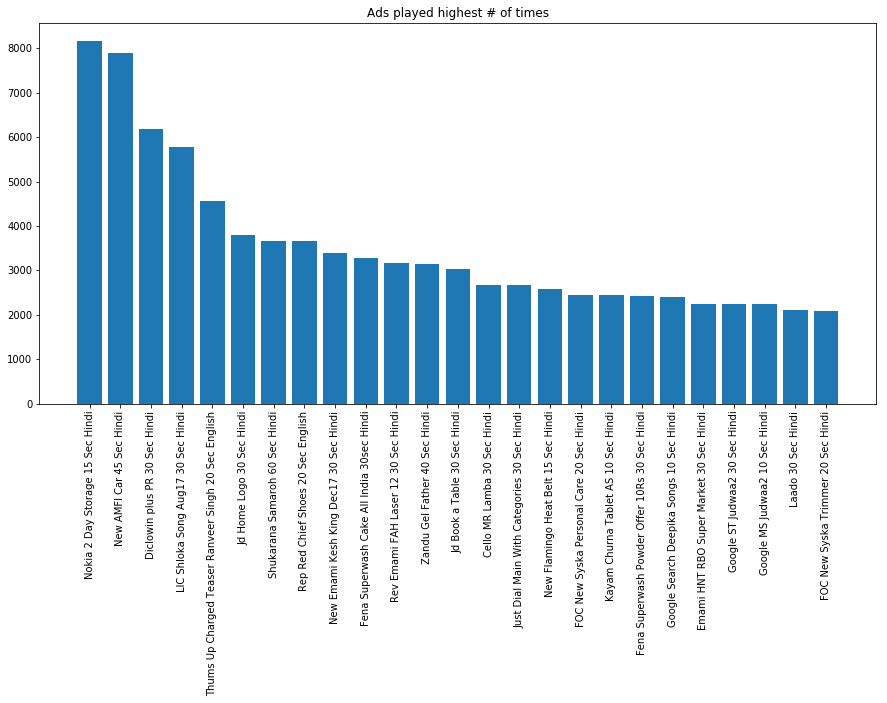

In [95]:
plt.figure(figsize=(15, 7))
plt.title('Ads played highest # of times')
plt.bar(range(25), n_played_ads.values[0:25])
plt.xticks(range(25), n_played_ads.index[0:25].tolist(), rotation=90)
plt.show()

In [96]:
n_played_ads.index[0:10]

Index(['Nokia 2 Day Storage 15 Sec Hindi', 'New AMFI Car 45 Sec Hindi',
       'Diclowin plus PR 30 Sec Hindi', 'LIC Shloka Song Aug17 30 Sec Hindi',
       'Thums Up Charged Teaser Ranveer Singh 20 Sec English',
       'Jd Home Logo 30 Sec Hindi', 'Shukarana Samaroh 60 Sec Hindi',
       'Rep Red Chief Shoes 20 Sec English',
       'New Emami Kesh King Dec17 30 Sec Hindi',
       'Fena Superwash Cake All India 30sec Hindi'],
      dtype='object', name='Master_Advt_Name')

In [97]:
least_dur_theaters = theater_adname.groupby('Theater_ID').sum()['Schedule_Duration'].sort_values()

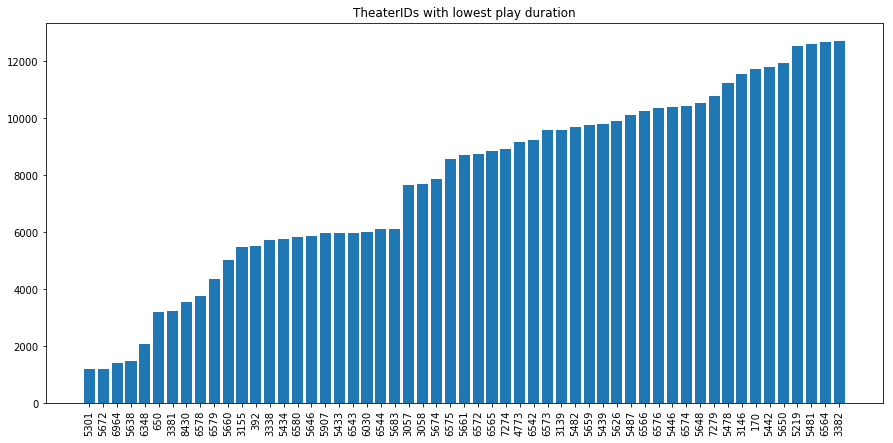

In [98]:
plt.figure(figsize=(15, 7))
plt.title('TheaterIDs with lowest play duration')
plt.bar(range(55), least_dur_theaters.values[0:55])
plt.xticks(range(55), least_dur_theaters.index[0:55].tolist(), rotation=90)
plt.show()

In [99]:
non_na[ non_na['Logs_Content_Name'] != non_na['Schedule_Content_Name'] ]

Empty DataFrame
Columns: [LogID, Theater_ID, Log_Category, Logs_Content_Type, Logs_Content_Name, Log_Time, RO_ID, Validation_From, Validation_to, Advt_ID, Schedule_Advt_Name, Schedule_Content_Name, Schedule_Duration, Master_Advt_Name, Client_ID, Agency_ID, Master_Duration, Advt_Language]
Index: []

In [100]:
like = ['.*PLAYER.*', '.*DIMMER.*','.*FADER.*', '.*LEVEL.*', '.*LIGHT.*', '.*LAMP.*', '.*DOWSER.*','.*DOUSER.*' , '.*SCOPE.*', '.*FORMAT.*', '.*MARKER.*', '.*BMP.*', '.*Vol.*', '.SYNC.*', '.*Sound.*', '.*Dolby.*']

In [101]:
tmp1 = join2[ pd.isnull(join2['Logs_Content_Type']) ].sort_values('Log_Time')
tmp1 = tmp1.fillna(-1)
tmp1[~tmp1['Logs_Content_Name'].str.contains('|'.join(like), case=False , na=False)]['Logs_Content_Name'].value_counts()

-1                                                 1185031
Pause                                                 3003
TIGER ZINDA HAI                                       2754
PRESHOW                                                784
FEATURE                                                780
S.L 3.8                                                731
S.L 5.5                                                634
FUKREY RETURNS                                         577
1211_LLOYD_LED_TV_60SEC_HIN_Sep17_FILM_J2K             558
DIGITAL 7.1                                            547
0116_HONEYWELL_10SEC_MUTE_SLIDE_J2K_07122017           478
James_Blunt_Slide_J2k_13Dec2017                        474
NIRVANA_20SEC_J2KAD_20092016                           460
DIGITAL 1                                              413
LUMINEX_UNO_URVASHI_FILM4_20SEC_J2KAD_20092016         396
LUMINEX_UNO_URVASHI_FILM3_20SEC_J2KAD_20092016         340
S.L 4.5                                                3

In [102]:
# join2['Log_Time'] = join2['Log_Time'].dt.strftime('%H:%M:%S')

In [103]:
join2['Log_Time'].head()

0   2017-12-15 01:08:00
1   2017-12-15 01:08:00
2   2017-12-15 01:09:00
3   2017-12-15 01:09:00
4   2017-12-15 01:09:00
Name: Log_Time, dtype: datetime64[ns]

In [104]:
pd.DataFrame(join2.columns)

0
0                   LogID
1              Theater_ID
2            Log_Category
3       Logs_Content_Type
4       Logs_Content_Name
5                Log_Time
6                   RO_ID
7         Validation_From
8           Validation_to
9                 Advt_ID
10     Schedule_Advt_Name
11  Schedule_Content_Name
12      Schedule_Duration
13       Master_Advt_Name
14              Client_ID
15              Agency_ID
16        Master_Duration
17          Advt_Language

In [105]:
join2.head(100)

LogID  Theater_ID        Log_Category Logs_Content_Type  \
0   261464736        5472       assetingested               cpl   
1   261464737        5472       assetingested               cpl   
2   261464738        5472       assetingested               cpl   
3   261464739        5472       assetingested               cpl   
4   261464740        5472       assetingested               cpl   
5   261464741        5472       assetingested               cpl   
6   261464742        5472       assetingested               cpl   
7   261464743        5472       assetingested               cpl   
8   261464744        5472       assetingested               cpl   
9   261464745        5472       assetingested               cpl   
10  261464746        5472        assetremoved               cpl   
11  261464747        5472        assetremoved               cpl   
12  261464748        5472        assetremoved               cpl   
13  261464749        5472        assetremoved               cpl   
14  261464750        5472        assetremoved               cpl   
15  261464751        5472        assetremoved               cpl   
16  261464752        5472        assetremoved               cpl   
17  261464735        5472       assetingested               cpl   
18  261464734        5472       assetingested               cpl   
19  261464733        5472       assetingested               cpl   
20  261464732        5472       assetingested               cpl   
21  261464731        5472       assetingested               cpl   
22  261457651        5589  contenttransferred     advertisement   
23  261457652        5589  contenttransferred     advertisement   
24  261457653        5589  contenttransferred     advertisement   
25  261457654        5589  contenttransferred     advertisement   
26  261457655        5589  contenttransferred     advertisement   
27  261457656        5589  contenttransferred     advertisement   
28  261457657        5589  contenttransferred     advertisement   
29  261457658        5589  contenttransferred     advertisement   
..        ...         ...                 ...               ...   
70  261457662        5589  contenttransferred     advertisement   
71  261457663        5589  contenttransferred     advertisement   
72  261457664        5589  contenttransferred     advertisement   
73  261457665        5589  contenttransferred     advertisement   
74  261457666        5589  contenttransferred     advertisement   
75  261457667        5589  contenttransferred     advertisement   
76  261457668        5589  contenttransferred     advertisement   
77  261457669        5589  contenttransferred     advertisement   
78  261457670        5589  contenttransferred     advertisement   
79  261457671        5589  contenttransferred     advertisement   
80  261457672        5589  contenttransferred     advertisement   
81  261457673        5589  contenttransferred     advertisement   
82  261457674        5589  contenttransferred     advertisement   
83  261457675        5589  contenttransferred     advertisement   
84  261457676        5589  contenttransferred     advertisement   
85  261457677        5589  contenttransferred     advertisement   
86  261464730        5472       assetingested               cpl   
87  261464729        5472       assetingested               cpl   
88  261464728        5472       assetingested               cpl   
89  261464727        5472       assetingested               spl   
90  261464753        5472        assetremoved               cpl   
91  261464763        5472        assetremoved               cpl   
92  261464764        5472        assetremoved               cpl   
93  261464765        5472        assetremoved               cpl   
94  261464766        5472        assetremoved               cpl   
95  261464754        5472        assetremoved               cpl   
96  261464755        5472        assetremoved               cpl   
97  261464756        5472        assetremoved          

In [106]:
join2.dropna()

LogID  Theater_ID         Log_Category Logs_Content_Type  \
185      261546008        5472             cplstart     advertisement   
828      261464530        3147             cplstart     advertisement   
1154     261562454        3312             cplstart     advertisement   
1695     261541011        5313             cplstart     advertisement   
1967     261490650        3149             cplstart     advertisement   
2156     261562985        3312             cplstart     advertisement   
2208     261546677        5313             cplstart     advertisement   
2738     261487739        5659  cpl playback start      advertisement   
2740     261487741        5659  cpl playback start      advertisement   
2884     261466680        3382             cplstart     advertisement   
3159     261515738        5659  cpl playback start      advertisement   
3188     261542135        3147             cplstart     advertisement   
3486     261550053        5313             cplstart     advertisement   
3490     261547833        5313             cplstart     advertisement   
3732     261490644        3149             cplstart     advertisement   
3941     261466686        3382             cplstart     advertisement   
3994     261544191        3147             cplstart     advertisement   
4154     261531582        5659  cpl playback start      advertisement   
4258     261696673        5472             cplstart     advertisement   
4278     261450959        6701             cplstart     advertisement   
4284     261450965        6701             cplstart     advertisement   
4327     261490656        3149             cplstart     advertisement   
4437     261553882        1078             cplstart     advertisement   
4452     261552629        1078             cplstart     advertisement   
4686     261563198        3312             cplstart     advertisement   
4739     261552777        5313             cplstart     advertisement   
5214     261560286        5659  cpl playback start      advertisement   
5275     261450979        6701             cplstart     advertisement   
5276     261450980        6701             cplstart     advertisement   
5278     261450982        6701             cplstart     advertisement   
...            ...         ...                  ...               ...   
3117417  269622186        9086             cplstart     advertisement   
3117469  269622240        9086             cplstart     advertisement   
3117470  269622241        9086             cplstart     advertisement   
3117471  269622242        9086             cplstart     advertisement   
3117475  269622246        9086             cplstart     advertisement   
3117477  269622248        9086             cplstart     advertisement   
3117482  269622253        9086             cplstart     advertisement   
3117544  269622257        9086             cplstart     advertisement   
3117546  269622303        9086             cplstart     advertisement   
3117547  269622304        9086             cplstart     advertisement   
3117548  269622305        9086             cplstart     advertisement   
3117550  269622307        9086             cplstart     advertisement   
3117555  269622312        9086             cplstart     advertisement   
3117557  269622314        9086             cplstart     advertisement   
3117582  269622318        9086             cplstart     advertisement   
3117584  269622320        9086             cplstart     advertisement   
3117585  269622321        9086             cplstart     advertisement   
3117586  269622345        9086             cplstart     advertisement   
3117590  269622349        9086             cplstart     advertisement   
3117595  269622354        9086             cplstart     advertisement   
3117596  269622355        9086             cplstart     advertisement   
3117598  269622357        9086             cplstart     advertisement   
3117599  269622358        9086             cplstart     advertisement  

In [107]:
join2.shape

(3117842, 18)

In [108]:
join2['Master_Duration'].value_counts()

30.0     72494
20.0     38329
45.0     14224
10.0     13452
15.0     11802
60.0     10534
40.0      6103
35.0      4933
90.0      1168
50.0      1022
5.0        588
25.0       374
112.0      248
119.0      146
55.0        60
120.0       16
Name: Master_Duration, dtype: int64

In [109]:
join2.columns

Index(['LogID', 'Theater_ID', 'Log_Category', 'Logs_Content_Type',
       'Logs_Content_Name', 'Log_Time', 'RO_ID', 'Validation_From',
       'Validation_to', 'Advt_ID', 'Schedule_Advt_Name',
       'Schedule_Content_Name', 'Schedule_Duration', 'Master_Advt_Name',
       'Client_ID', 'Agency_ID', 'Master_Duration', 'Advt_Language'],
      dtype='object')